In [106]:
`

In [397]:
# Set Parameters
Ndata=200
data_lims=[-10,10]
order=4
beta=[1E0,1.1E-1,1E-2,-0.2E-3,-0.6E-4]
sigma_e=0.1
train_set=np.arange(150)

#Create Data:
t=np.linspace(data_lims[0],data_lims[1],Ndata)
e=stats.norm.rvs(0,sigma_e,Ndata)
X=np.zeros([Ndata,order+1])
for j in range(order+1):
    X[:,j]=t**j

    
#True data and obs         
ytrue=np.dot(X,beta)
yobs =ytrue+e



#define a training set
t_train=t[train_set]
X_train=X[train_set,:]
ytrue_train=ytrue[train_set]
yobs_train=yobs[train_set]

Z_train=X[train_set,:-1]
Z=X[:,:-1]

model=LinearRegression().fit(X_train,yobs_train)
yhat_train=model.predict(X_train)

modelz=LinearRegression().fit(Z_train,yobs_train)
zhat_train=modelz.predict(Z_train)

zhat=modelz.predict(Z)


Text(0, 0.5, 'y')

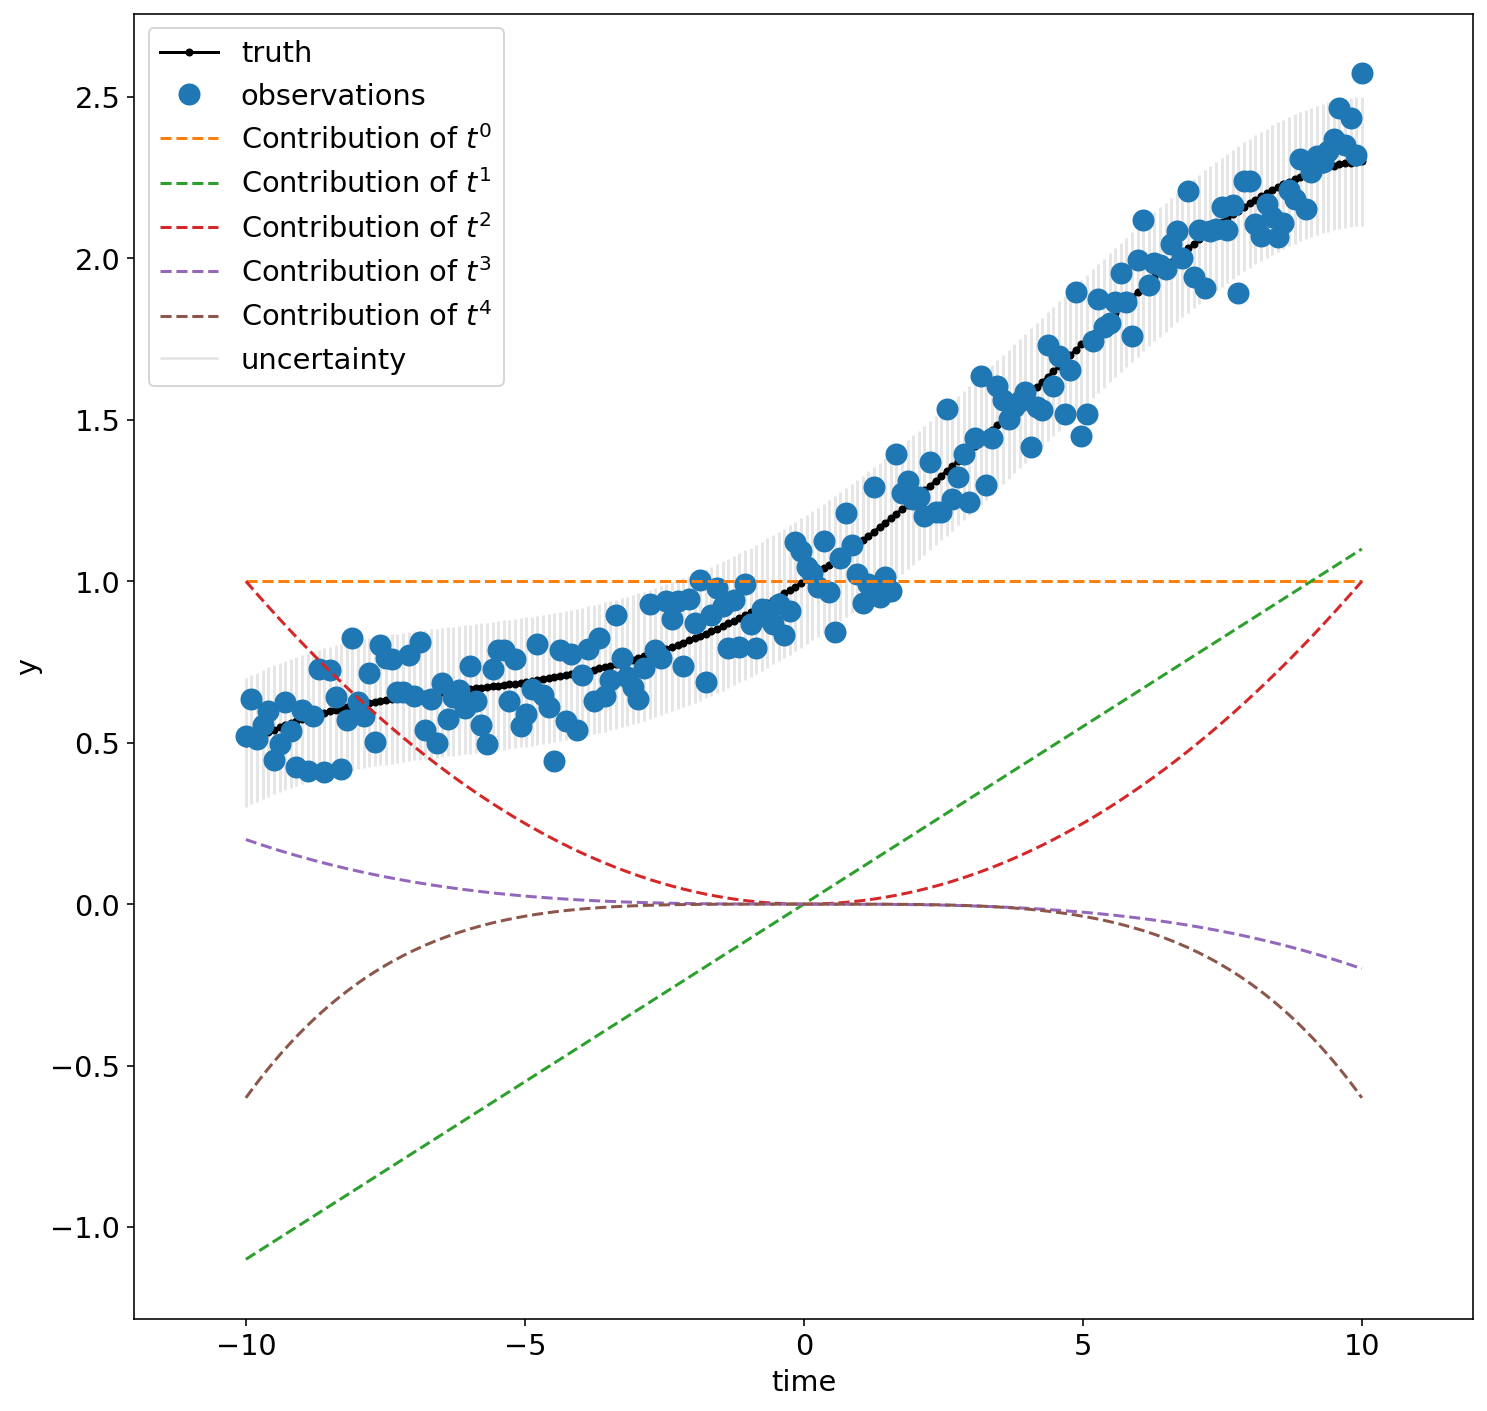

In [398]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t,ytrue,'k.-',label='truth')
plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9],label='uncertainty')
plt.plot(t,yobs,'o',markersize=10,label='observations')
for j in range(order+1):
    y=beta[j]*(t**j)
    plt.plot(t,y,'--',label='Contribution of $t^'+str(j)+'$')
plt.legend();
plt.xlim(left=-12,right=12); 
#plt.ylim(bottom=-5,top=100)
plt.xlabel('time')
plt.ylabel('y')

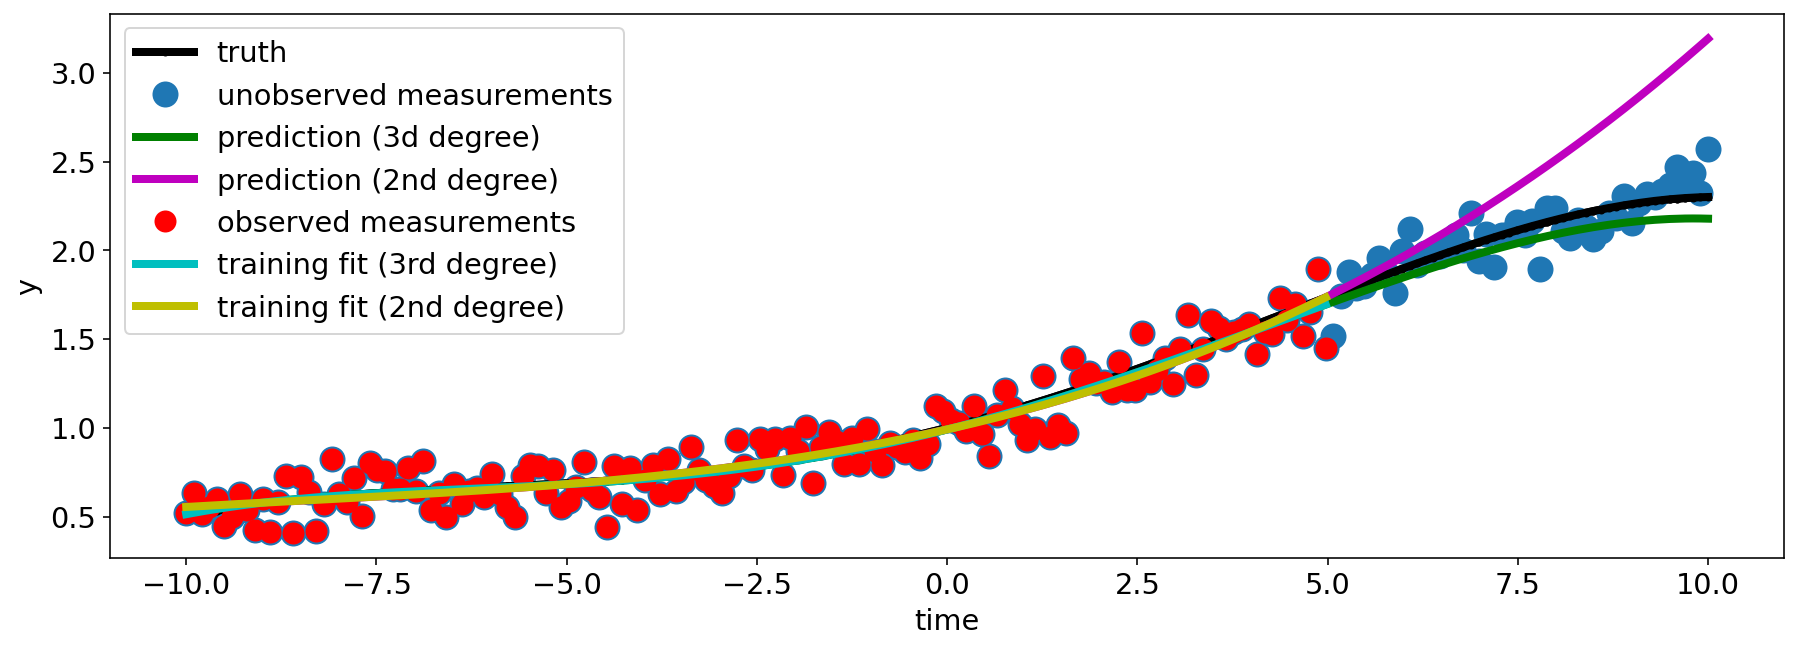

In [399]:
### fig,ax=plt.subplots(1,figsize=[12,12])


yhat=model.predict(X)
#yhat=model3.predict(X)

plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
plt.plot(t,yhat,'g-',label='prediction (3d degree)',linewidth=4,)
plt.plot(t,zhat,'m-',label='prediction (2nd degree)',linewidth=4,)
plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit (3rd degree)')

plt.plot(t_train,zhat_train,'y',linewidth=4,markersize=10,label='training fit (2nd degree)')



#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
#plt.xlim(left=-1,right=16);
#plt.ylim(bottom=-5,top=100);
plt.legend()

plt.xlabel('time')
plt.ylabel('y')

mse_train=np.sum((yhat_train-yobs_train)**2)
mse_pred =np.sum((yhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

#plt.text(0,40,'MSE train 3rd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
#plt.text(0,60,'MSE pred  3rd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

mse_train=np.sum((zhat_train-yobs_train)**2)
mse_pred =np.sum((zhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

#plt.text(0,45,'MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
#plt.text(0,65,'MSE pred  2nd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

In [400]:
# number of data points 

Norder =8

Ndraws=2000
yhat_vec=np.zeros([200,Ndraws])
zhat_vec=np.zeros([200,Ndraws])

mse_pred_vec=np.zeros(Ndraws)
mse_train_vec=np.zeros(Ndraws)
bias_vec=np.zeros(Ndraws)

mse_train_ord=np.zeros(Norder)
mse_pred_ord =np.zeros(Norder)
bias_ord     =np.zeros(Norder)

for m in range(Norder):

    for k in range(Ndraws):
        #Create Data:
        t=np.linspace(data_lims[0],data_lims[1],Ndata)
        e=stats.norm.rvs(0,sigma_e,Ndata)
        Z=np.zeros([Ndata,order+1])
        for j in range(order+1):
            Z[:,j]=t**j

        X=np.zeros([Ndata,m+1])        
        for j in range(m+1):
            X[:,j]=t**j
            
        #True data and obs         
        ytrue=np.dot(Z,beta)
        yobs =ytrue+e

        #define a training set
        t_train=t[train_set]
        X_train=X[train_set,:]
        ytrue_train=ytrue[train_set]
        yobs_train=yobs[train_set]

        model=LinearRegression().fit(X_train,yobs_train)
        yhat_train=model.predict(X_train)
        yhat=model.predict(X)
        yhat_vec[:,k]=yhat                    


        mse_train=np.sum((yhat_train-yobs_train)**2)
        mse_pred =np.sum((yhat-yobs)**2)
        mse_train=np.sqrt(mse_train/len(yhat_train))
        mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

        mse_pred_vec[k]=mse_pred
        mse_train_vec[k]=mse_train
        bias_vec[k]=np.mean(yhat[151:]-yobs[151:])

    mse_pred_ord[m] =np.mean(mse_pred_vec)
    mse_train_ord[m]=np.mean(mse_train_vec)

    bias_ord[m]     =np.mean(bias_vec)

(0.0, 1.5)

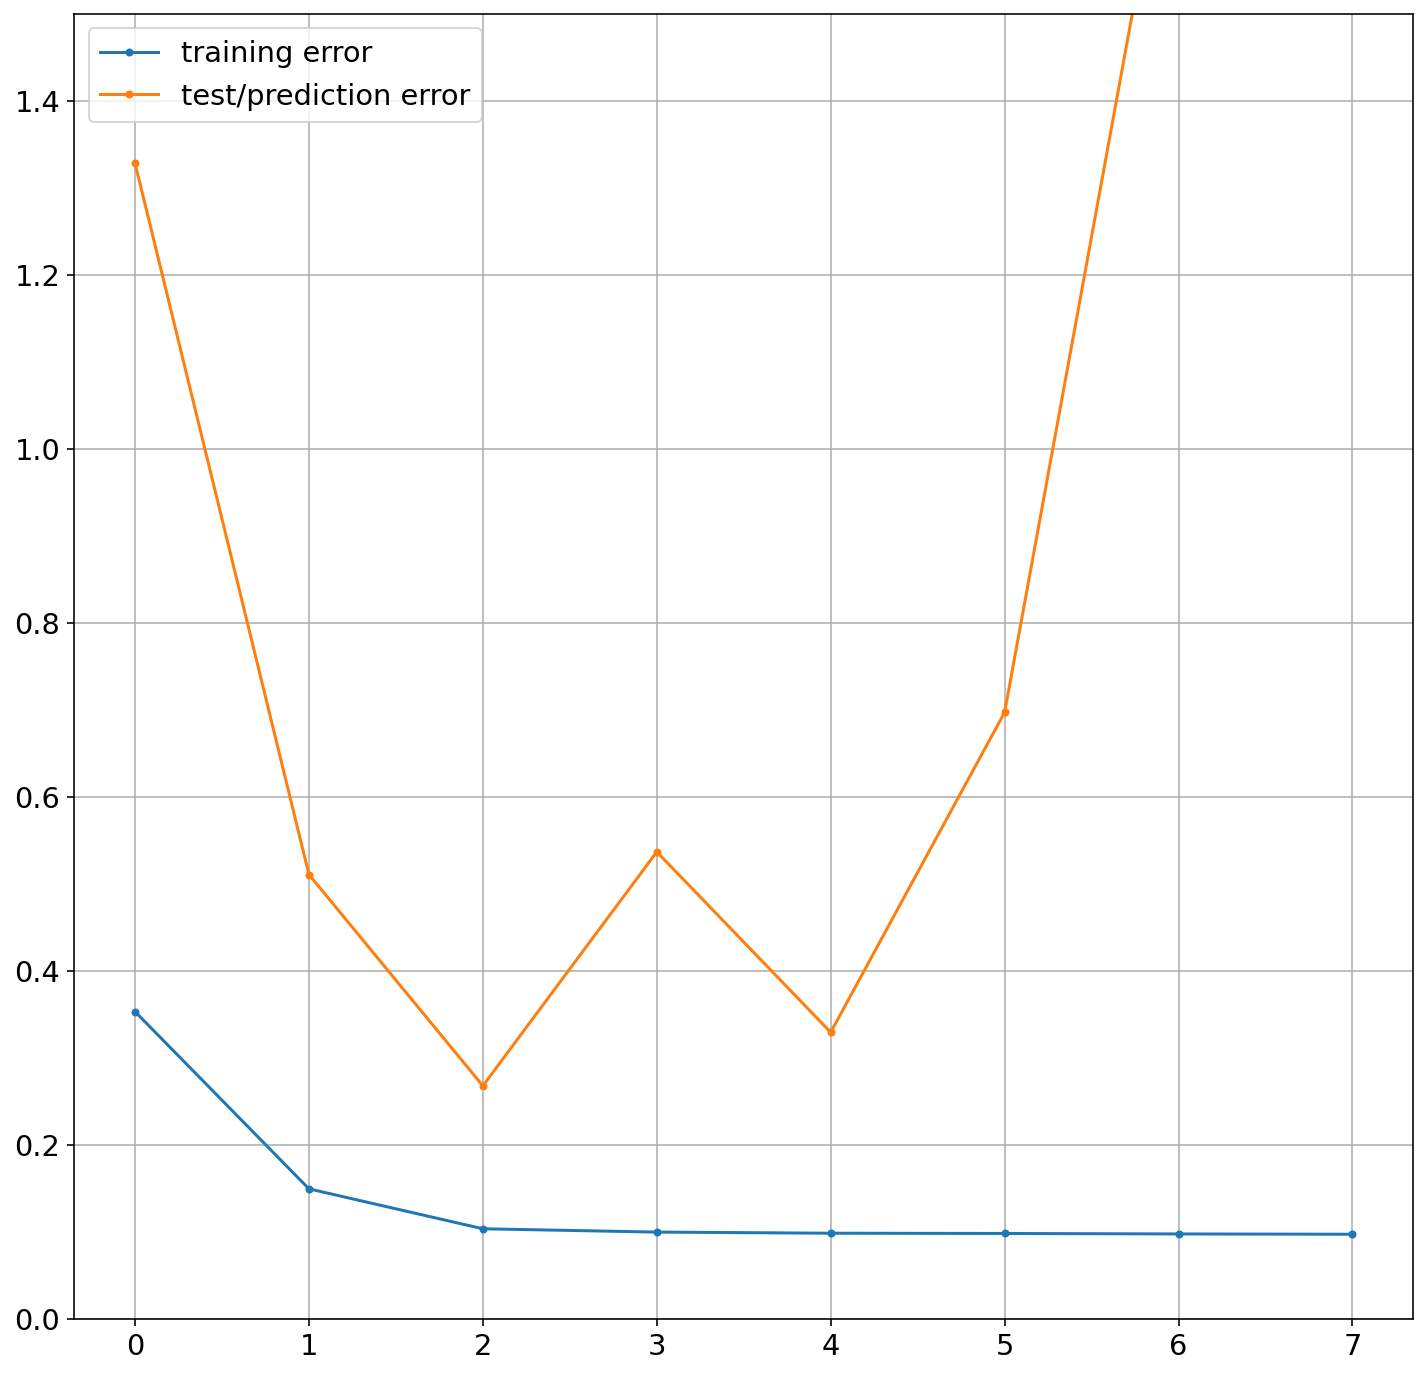

In [401]:
fig,ax=plt.subplots(1,figsize=[12,12])

plt.plot(mse_train_ord,'.-',label='training error')
plt.plot(mse_pred_ord,'.-',label='test/prediction error')
#plt.plot(bias_ord,'o-',label='bias')
plt.legend()
plt.grid()
plt.ylim(0,1.5)

(-2.0, 4.0)

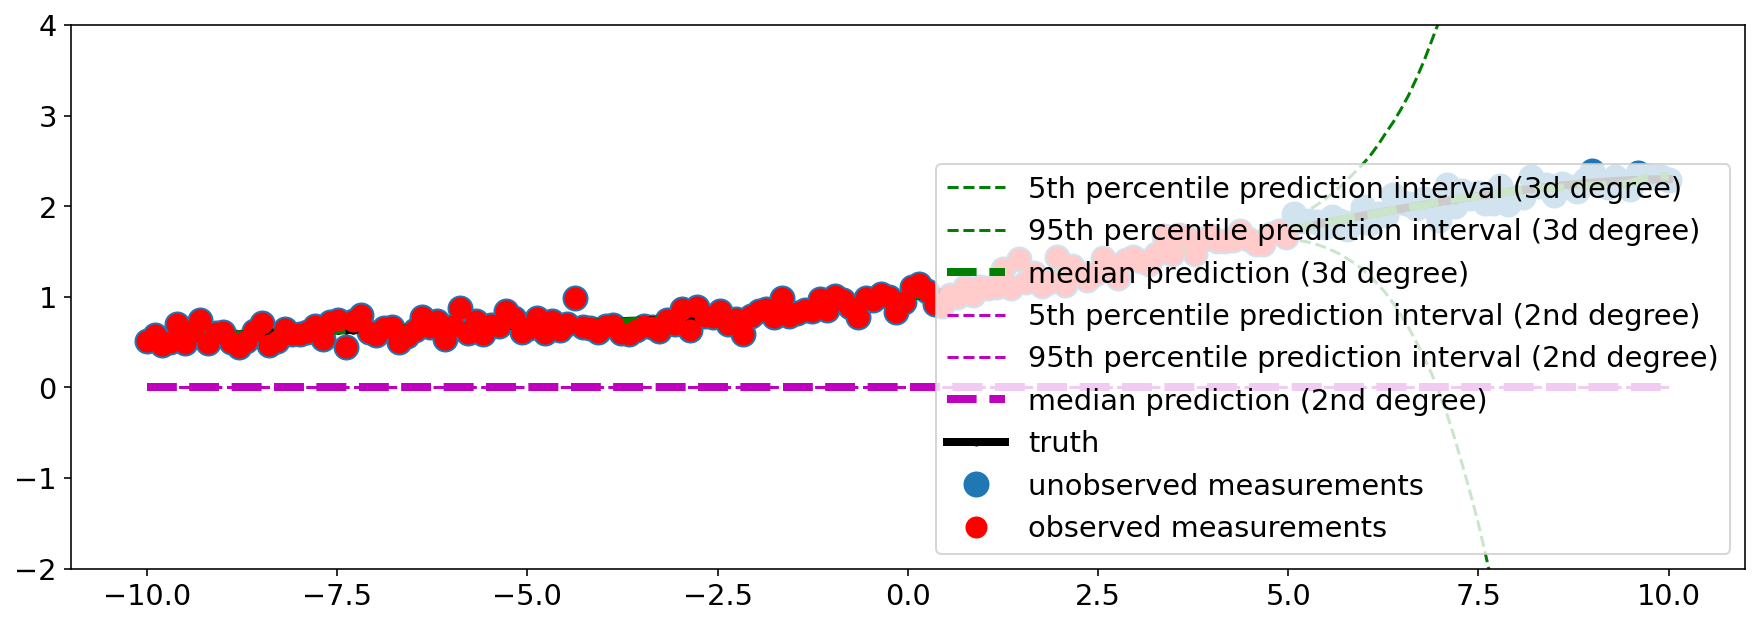

In [402]:
### fig,ax=plt.subplots(1,figsize=[12,12])


#plt.plot(t,yhat_vec,color=[0.8,0.8,0.8]);
plt.plot(t,np.percentile(yhat_vec,5,1),'g--',label='5th percentile prediction interval (3d degree)')
plt.plot(t,np.percentile(yhat_vec,95,1),'g--',label='95th percentile prediction interval (3d degree)')
plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4,label='median prediction (3d degree)')

plt.plot(t,np.percentile(zhat_vec,5,1),'m--',label='5th percentile prediction interval (2nd degree)')
plt.plot(t,np.percentile(zhat_vec,95,1),'m--',label='95th percentile prediction interval (2nd degree)')
plt.plot(t,np.percentile(zhat_vec,50,1),'m--',linewidth=4,label='median prediction (2nd degree)')



plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)

plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4)
plt.plot(t,np.percentile(zhat_vec,50,1),'m--',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
#plt.plot(t,yhat,'g-',label='prediction',linewidth=4,)

plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
plt.legend()
plt.ylim(-2,4)